## Finding the Two Best Markets for Advertising E-learning Product

The purpose of this project is to combine some statistical data analysis skills with practical analysis for an e-learning company. The company offers a variety of programming courses, most are in web and mobile development. however, they also expand into other domains like data science, game development, etc. Our goal here is to find the two best markets to advertise our product in.

Rather than go through the expense of performing surveys in multiple markets which would be very costly we will use an existing survey. We will be using  __[freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/)__. This is a free e-learning platform that offers courses in web development. They also run a popular __[Medium publication](https://www.freecodecamp.org/news/)__ that has over 400,000 followers. The survey attracted coders with different interest beyond just web development, which is fitting for the purpose of our analysis. The survey data is publicly available __[here](https://github.com/freeCodeCamp/2017-new-coder-survey)__.

We will start by reading in the data and doing a brief exploration.

In [69]:
import pandas as pd

#reading in data
#fcc_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory =0)
fcc_survey = pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv',
                        low_memory =0)
#low memory to keep dtypes warning silent

#quick look at data
print(fcc_survey.shape)
pd.options.display.max_columns = 150 #avoid truncated output
fcc_survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity

Before we do any analysis, we should be sure our data is a representative sample for our purposes. We have a good amount of data with over 18,000 respondents answering over 100 questions each. As we said we offer courses in programming, mainly web and mobile development, but we also have other domains like game development, data science, etc. We want a sample of new coders that are interested in what we want to teach. We would like to know:
- Where they are located.
- Locales having a high density of new coders.
- Amount they are willing to spend on learning.

We will start by clarifying if the data set has the right categories for our purposes. At first glance some of the columns that look most interesting to us are `JobRoleInterest`, `CountryLive` and `MoneyForLearning`.

Let's start with examining whether this sample has respondents interested in what we teach. The `JobRoleInterest` column looks to have information to help us determine what jobs the learners are interested in. If we know what jobs they are working toward, it will tell us what they are likely interested in learning. Let's look at the frequency distribution and determine if this data is relevant for our purpose.

In [70]:
fcc_survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                        11.770595
  Front-End Web Developer                                                                                                                                                                                                        6.435927
  Data Scientist                                                                                                                                                                                                                 2.173913
Back-End Web Developer                                                                                                                                                                                                           2.030892
  Mobile Developer                                              

The results above are quite granular. At a quick glance it looks like:
- Many are interested in web development (full-stack web development, front-end web development, back-end web development).
- A few are interested in mobile development.
- A few are interested in other domains like game development, etc.

It is also easy to see that many have more than one `JobRoleInterest`. Consequently, we will investigate how many roles people are interested in. We will split the `JobRoleInterest` column and create a frequency table describing how many options people have chosen. We will drop the `Nan` values since they can't be split. Then we will split each string in order to create our frequency table.

In [71]:
#dropping null values
interests_no_null = fcc_survey['JobRoleInterest'].dropna()
#splitting the string
split_interests = interests_no_null.str.split(',')

#frequency table for job role options
num_options = split_interests.apply(lambda x: len(x))
num_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

We observe above that over 2/3 of the people have more than one `JobRoleInterest`. This could be beneficial to us as we provide multiple areas of programming education.

However, since we specialize in mobile and web development let's see how many of those in the survey might be interested in that type of course.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


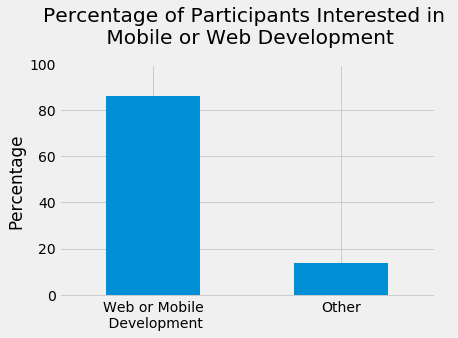

In [72]:
#frequency table
mobile_or_web = interests_no_null.str.contains(
'Web Developer|Mobile Developer')
freq_mobile_web = mobile_or_web.value_counts(normalize=True) * 100
print(freq_mobile_web)

#graph of mobile or web developer frequency table
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

freq_mobile_web.plot.bar()
plt.title('Percentage of Participants Interested in \n Mobile or Web Development', y = 1.06)
plt.ylabel('Percentage')
plt.xticks([0,1], ['Web or Mobile\n Development', 'Other'], rotation=0)
plt.ylim(-1, 100)

plt.show()

In this survey an overwhelming majority (about 86%) of the respondents indicated they are interested in either mobile or web development. We specialize in education for this type of programming. This is strong evidence the survey is representative of the population we wish to target with our advertising. Just as in the survey, we do offer other educational programs, but mostly specialize in the two previously mentioned specialties.

Now that we trust this data is representative of our target audience, we will investigate these questions about our potential customers:
- Where are they located?
- Where is the greatest concentration of new coders?
- How much are they willing to spend to learn?

## New Coders and Densities

We will begin our investigation by examining where the new coders are located. We will use the `CountryLive` column in this step. We are concerned with a potential new coder's current residence, not country of origin, where we would run our ads. 

We will also want to get an idea of how many new coders there are in each area. We wouldn't want to advertise in too small of a market. This survey data provides information on a country level. This makes our goal to find the two best countries to advertise in.

We will start by examining the frequency table of the `CountryLive` column which gives us information as to where the new coder currently resides. In order to be the most representative of the sample we want, we will eliminate those that did not fill out `JobRoleInterest` on their survey.

In [73]:
#drop those that didn't fill out job role interest
fcc_job_notnull = fcc_survey[fcc_survey['JobRoleInterest'].notnull()].copy()

#absolute and relative frequencies
country_abs_freq = fcc_job_notnull['CountryLive'].value_counts()
country_rel_freq = fcc_job_notnull['CountryLive'].value_counts(
    normalize=True)* 100

#make it presentable to read
pd.DataFrame( data = {'Absolute Frequency': country_abs_freq,
                        'Percentage' : country_rel_freq}
            )

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Botswana,1,0.014624
Gambia,1,0.014624
Cuba,1,0.014624
Bolivia,1,0.014624


We can easily see in the distribution above that the United States has by far the highest number of new coders (45% of total) providing the most interesting possibility for an ad campaign. India (7.7%), UK (4.6%) and Canada (3.8%) also provide interesting possibilities for another market.

While this is good information, we need to investigate further. We will need to find out how much people are willing to spend money to learn. Advertising where people are very likely to try and learn for free makes it less likely to be successful in an ad campaign there.

## Spending Money for Learning

The `MoneyForLearning` column provides information in US dollars of the amount of money spent by participants since the time they started coding until they completed the survey. We sell subscriptions at $59 (US)/month and for that reason we will want to find out how much each student has been spending per month. 

We will only be using the U.S., India, UK and Canada for this analysis. There are two reasons for that:
- These are the countries with the highest frequencies, so that we have a sufficient amount of data for each country.
- We write our courses in English. English is an official language of all four of the above countries. Our chances of success should be better if English is understood well in our potential market.

Below we will create a new column `dollars_per_month` that describes how much each student is willing to spend on learning to code each month. We will accomplish this by dividing the `MoneyForLearning` column by the `MonthsProgramming` column. This does present a slight issue, as some students answered 0 for `MonthsProgramming` (presumably just starting). We will replace 0 with 1 in the `MonthsProgramming` column in order to solve the divide by zero problem.

In [74]:
#replacing 0 with 1 to avoid a can't divide by zero error
fcc_job_notnull['MonthsProgramming'].replace(0,1, inplace=True)

#creating dollars_per_month student spend column
fcc_job_notnull['dollars_per_month'] = fcc_job_notnull['MoneyForLearning'] / (
                                        fcc_job_notnull['MonthsProgramming'])

fcc_job_notnull['dollars_per_month'].isnull().sum()

675

In order to more representative of our target market, let's drop those that have null values in the `dollars_per_month` column.

In [75]:
#dropping null values in money for learning
fcc_spend_notnull = fcc_job_notnull[fcc_job_notnull['dollars_per_month'].notnull()]

We want to examine the student `dollars_per_month` by country so we will also drop any rows that have nothing entered in the `CountryLive` column. Then we will assess if we still have enough data for our four countries of interest.

In [76]:
#dropping rows with no value for where they live
fcc_clean = fcc_spend_notnull[fcc_spend_notnull['CountryLive'].notnull()]

#top 5 of frequency table to inspect if sufficient data remaining
fcc_clean['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

It looks like we still have enough data, we will proceed with calculating the mean student `dollars_per_month`. We will examine all four countries of interest.

In [77]:
#mean student spend per month by country
country_mean = fcc_clean.groupby('CountryLive').mean()
country_mean['dollars_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: dollars_per_month, dtype: float64

These results seem a bit surprising based on socio-economic factors like GDP per capita and PPP (purchasing power parity) information found __[here](https://www.worldometers.info/gdp/gdp-per-capita/)__. This, along with our intuition expected India to be a bit lower relative to the UK and Canada. The US number also seems quite high relative to the other three. 

We need to investigate further. We may have outliers that are affecting our numbers, lack of representative data for the UK and Canada making it low, data inflating the India mean or our information may be correct.

## Outlier Investigation

Let's look to see if we have any extreme outliers that may be affecting our `dollars_per_month` data for each country.

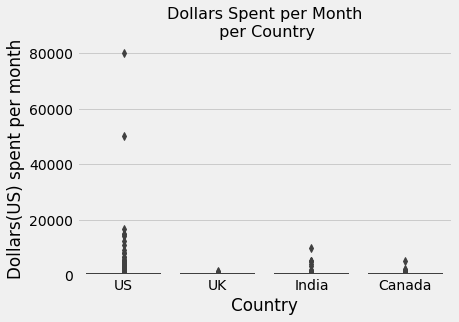

In [78]:
#getting only top 4 countries we want
top_four_spend = fcc_clean[fcc_clean['CountryLive'].str.contains(
'United States|India|United Kingdom|Canada')]

#comparing ratings data with boxplots
import seaborn as sns

sns.boxplot(y = 'dollars_per_month', x = 'CountryLive', data = top_four_spend)

plt.title('Dollars Spent per Month\n per Country', fontsize = 16)
plt.ylabel('Dollars(US) spent per month')
plt.ylim(0, 84000)
plt.xlabel('Country')
#to avoid overlapping of country names
plt.xticks(range(4), ['US',  'UK', 'India', 'Canada'])
plt.show()

It is difficult to see if there are any issues with the UK, India or Canada data. However, we can see that there are some extreme outliers in the U.S. data. Although it is possible that someone could be spending \\$50,000/month (US) or more for coding education, it is highly unlikely. We will remove these extremes by eliminating those spending over $20,000/month (US) and then examine a little closer.

In [79]:
#eliminating extreme US outliers spending over 20K per month
top_four_spend = top_four_spend[top_four_spend['dollars_per_month'] < 20000]

Now we will recalculate the means and view the boxplots once again.

In [80]:
#recalculating the means of top 4 spend per month
top_four_mean = top_four_spend.groupby('CountryLive').mean()
top_four_mean['dollars_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: dollars_per_month, dtype: float64

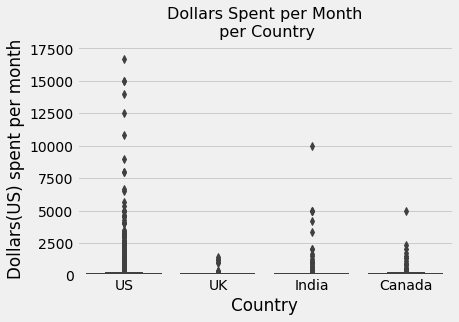

In [81]:
sns.boxplot(y = 'dollars_per_month', x = 'CountryLive', data = top_four_spend)

plt.title('Dollars Spent per Month\n per Country', fontsize = 16)
plt.ylabel('Dollars(US) spent per month')
plt.ylim(0, 18000)
plt.xlabel('Country')
#to avoid overlapping of country names
plt.xticks(range(4), ['US',  'UK', 'India', 'Canada'])
plt.show()

We can now see we have some outliers in our India country data. A few survey respondents indicated they spend over \$2000/month (US) on coding education. It is unclear at this point if this data is good or not. Perhaps they just payed for a coding bootcamp and had just started to learn coding that would give them a high per month figure. Let's look at the data for those living in India that have very high spending for further insights.

In [82]:
#Examine outliers in India
india_outliers = top_four_spend[(top_four_spend['CountryLive'] == 'India') &
                               (top_four_spend['dollars_per_month'] > 2000)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,dollars_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,

None of these six respondents indicated that they attended a bootcamp. It is unclear if these respondents actually spent this much on coding education. Our survey question was _"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"_  It is possible they may have included their college tuition, particularly possible given their young ages. Another possibility is that they may have calculated their spending in Indian Rupees rather than US dollars, the conversion rate was about 66.5 rupees to 1 US dollar at time of this survey. Given these two possibilities, it seems safer to remove these outliers.

In [83]:
#dropping India outliers using row index
top_four_spend = top_four_spend.drop(india_outliers.index)

If we look back at the most recent boxplots we will see more US outliers over \\$6000/month (US). We will examine these closer in our next code block.

In [84]:
#Examine more US outliers 
us_outliers = top_four_spend[(top_four_spend['CountryLive'] == 'United States of America') &
                             (top_four_spend['dollars_per_month'] > 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,dollars_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Here we have eleven respondents that claim to be spending over \\$6000 (US)/month on coding education. Of those eleven, five did not claim to have attended a coding bootcamp. We will drop these rows for similar reasons as we did with the India outliers. 

The other six did attend a bootcamp which would justify the large amount of money spent. However, all six of these respondents have been coding three months or less. This leads to a monthly spending average that is too heavily skewed by large up-front payment and short time programming. Therefore, it makes sense to remove these outliers as well.

In [85]:
#removing all the US outliers over $6K/month
#includes both no bootcamp and bootcamp w/low months programming
top_four_spend = top_four_spend.drop(us_outliers.index)

There was also one outlier in the Canada data in our previous set of boxplots. Let's look at this respondent as well before we recompute our country means and show new boxplots.

In [86]:
#Examine Canada outlier 
canada_outliers = top_four_spend[(top_four_spend['CountryLive'] == 'Canada') &
                             (top_four_spend['dollars_per_month'] > 4000)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,dollars_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Like our US outliers, this respondent has attended a bootcamp but has less than three `MonthsProgramming` and we will therefore drop them.

In [87]:
#Removing Canada outlier
top_four_spend = top_four_spend.drop(canada_outliers.index)

Now we will recalculate our country means and look at our boxplots one more time.

In [88]:
#recalculating the means of top 4 spend per month
top_four_mean = top_four_spend.groupby('CountryLive').mean()
top_four_mean['dollars_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: dollars_per_month, dtype: float64

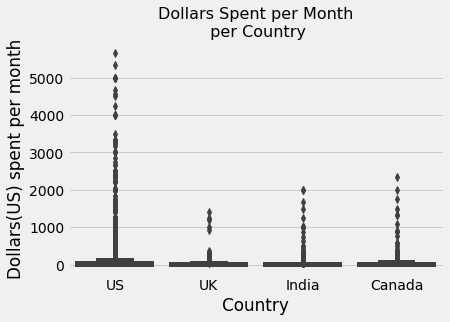

In [89]:
sns.boxplot(y = 'dollars_per_month', x = 'CountryLive', data = top_four_spend)

plt.title('Dollars Spent per Month\n per Country', fontsize = 16)
plt.ylabel('Dollars(US) spent per month')
plt.xlabel('Country')
#to avoid overlapping of country names
plt.xticks(range(4), ['US',  'UK', 'India', 'Canada'])
plt.show()

It has become obvious that the US should be our first market of choice for an advertising campaign. It has the most new coders and also has the highest average amount spent each month per coder. At this point we will eliminate the United Kingdom from contention for two reasons:
- The UK mean spending figure is about 23% less than our subscription rate.
- The number of coders in the UK is less than India and not significantly higher than Canada.

A low to moderate relatively sized population with a lower willingness to spend money at our subscription rate leads us to dismiss the United Kingdom as a possibility as a top two market for our advertising campaign.

## Comparing India and Canada

Now that we have chosen our first market, we need to determine our choice for a second market. Currently the choice for a second market for our advertising campaign is a bit unclear. We will investigate a little further into India vs. Canada. We will begin by getting all the Canada and India information together.

In [90]:
#getting india and canada together
india_canada = top_four_spend[top_four_spend['CountryLive'].str.contains(
    'India|Canada')]

### Spending other than Bootcamp

We want to get a little better idea of the actual dollar amount people in each country might spend on a subscription like ours. In order to accomplish this, we will:
- Disregard those that haven't spent any money
- Disregard those that have attended a full bootcamp

This leaves us with people that are willing to spend money for their coding education outside of a bootcamp. Possible formats include ongoing classes, individual classes, lectures series or subscription services. 

By doing this we also eliminate the possibility of the high spending per month by someone who has recently signed up for a full bootcamp and has very few months coding experience. We would like to capture people that are not currently spending money for coding education in our ad campaign. However, the purpose here is to get an idea of the average amount spenders in these two countries currently _do_ spend. Therefore, we will eliminate those with 0 `dollars_per_month`. 

In [91]:
#india and canada eliminating non-spenders AND spenders w/bootcamp
india_canada_subscr = india_canada[(india_canada
                                               ['dollars_per_month'] > 0) &
                                              (india_canada
                                               ['AttendedBootcamp'] == 0.0)]

#show results
india_canada_subscr_mean = india_canada_subscr.groupby('CountryLive').mean()
india_canada_subscr_mean['dollars_per_month'][[ 'India', 'Canada']]

CountryLive
India     148.412135
Canada    141.821186
Name: dollars_per_month, dtype: float64

We can see in the results above that both countries spend well over our $59/month (US) subscription rate in `dollars_per_month`, for spenders spending money outside of bootcamps. It is interesting to note how high the average is for India. We will  check for outliers first and then examine if there is a disproportionate amount of people that spend money in this way in either of the countries.

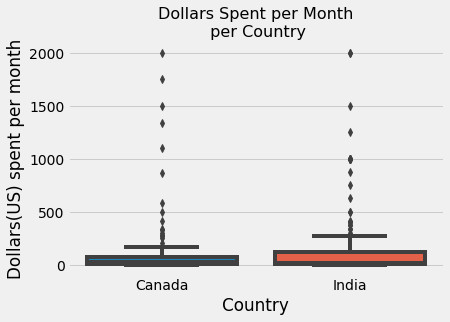

In [92]:
sns.boxplot(y = 'dollars_per_month', x = 'CountryLive', 
            data = india_canada_subscr)

plt.title('Dollars Spent per Month\n per Country', fontsize = 16)
plt.ylabel('Dollars(US) spent per month')
plt.xlabel('Country')

plt.show()

### Outlier Investigation for India and Canada

We can see we have a few outliers here, let's look at those with over $1000/month (US) spending.

In [93]:
india_canada_outliers = india_canada_subscr[india_canada_subscr
                                            ['dollars_per_month'] > 1000]
india_canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,dollars_per_month
4250,49.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More than 60 minutes,Canada,Canada,food and beverage,NaN,Employed for wages,NaN,45000.0,1.0,NaN,female,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,8.0,e2f01eaa28d5fa72290c54b462e314ed,9036189ac43e4a9600b331f3cd606a14,8000.0,1.0,0.0,0.0,1.0,Within the next 6 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,no preference,Tagalog,"single, never married",3000.0,2.0,a2f416f317,2017-03-13 21:57:05,2017-03-13 21:49:37,2017-03-13 22:00:51,2017-03-13 21:57:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Web Developer 2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,bachelor's degree,Economic Development,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000
6350,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,15 to 29 minutes,India,India,office and administrative support,NaN,Employed for wages,NaN,15000.0,1.0,NaN,male,NaN,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,2.0,f8f9fc9cfc0349cc5c19991bfe1f8bc6,b7dd30aad6f187477d4a8679ecdc1d1f,40000.0,0.0,0.0,0.0,0.0,Within the next 6 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,Full-Stack Web Developer,no preference,Hindi,"single, never married",15000.0,10.0,8c3fca53f7,2017-03-20 10:14:38,2017-03-20 10:07:09,2017-03-20 10:18:39,2017-03-20 10:14:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,bachelor's degree,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN

We can see that these respondents are the type of people we would like to capture. They attend coding events like workshops, weekend bootcamps, etc. They show a willingness to spend their money and time outside of work to further their coding education. This is precisely what we offer. However, most of them are new coders with 4 `MonthsProgramming` or less and we will drop them as their `dollars_per_month` figures are just too skewed by the lack of `MonthsProgramming`.

We also have 3 respondents that have a high (\\$15,000 (US) or more) `MoneyForLearning`  number. Two of the three show no weekend bootcamps, code events or other avenues where they might spend that much money on coding education. Since we can't substabtiate where they have spent their money we will drop them both. The third has attended weekend bootcamps which opens up the possibility their `dollars_per_month` value is correct. We will keep them as dropping them is unsubstantiated.

In [94]:
#isolating outlier coder india/canada with little experience
newbie_ic_outlier = india_canada_outliers[india_canada_outliers
                                          ['MonthsProgramming'] <= 4]
#dropping newbie outliers from india/canada
india_canada_subscr = india_canada_subscr.drop(newbie_ic_outlier.index)

#isolating 2 of 3 india/canada high spenders to drop, keeps one at $15k
spendy_ic_outliers = india_canada_outliers[india_canada_outliers
                                          ['MoneyForLearning'] > 15000]
# dropping high india/canada spenders
india_canada_subscr = india_canada_subscr.drop(spendy_ic_outliers.index)

In [95]:
#recalculate india/canada spending mean after outlier investigation
india_canada_subscr_mean = india_canada_subscr.groupby('CountryLive').mean()
india_canada_subscr_mean['dollars_per_month'][[ 'India', 'Canada']]

CountryLive
India     122.580073
Canada     83.994034
Name: dollars_per_month, dtype: float64

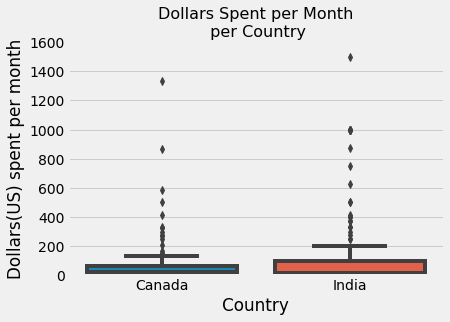

In [96]:
#india/canada boxplots after outlier investigation
sns.boxplot(y = 'dollars_per_month', x = 'CountryLive', 
            data = india_canada_subscr)

plt.title('Dollars Spent per Month\n per Country', fontsize = 16)
plt.ylabel('Dollars(US) spent per month')
plt.ylim(0, 1600)
plt.xlabel('Country')

plt.show()

We can see above that India has a higher mean spend in `dollars_per_month` after we removed extreme outliers. However, to get a little better idea of our possible ad success we need to examine how willing respondents in each country are to spend their money.

### India vs. Canada Spending

We have established that new coders that are willing to spend money on coding education outside of bootcamps in India are willing to spend more on average per month than those in Canada. For that to be beneficial for an ad campaign we will need to examine each country's willingness to spend on coding education. It doesn't benefit us to have a high mean spending amount unless they are willing to spend the money. We will investigate both the absolute and relative frequencies of those that spend in each country. In addition to looking at the overall willingness to spend, we will examine the willingness of those that spend outside of a bootcamp to spend \\$59 (US)/month or more.


We will begin our spending investigation by examining the overall willingness of people in India and Canada to spend any money on coding education.

In [97]:
#calculating % of people in India willing to spend: all non null india spenders divided by all india survey participants
india = fcc_clean[fcc_clean['CountryLive'] == 'India']
india_spenders = india[india['dollars_per_month'] > 0]
india_prcnt_spend = round((len(india_spenders.index)/len(india.index)) * 100, 2)

#calculating % of people in Canada willing to spend: all non null canada spenders divided by all canada survey participants
canada = fcc_clean[fcc_clean['CountryLive'] == 'Canada']
canada_spenders = canada[canada['dollars_per_month'] > 0]
canada_prcnt_spend = round((len(canada_spenders.index)/len(canada.index)) * 100, 2)

#making it presentable to read
df_spend = pd.DataFrame(data = {'Spenders Count': (len(india_spenders.index), 
                                                                         len(canada_spenders.index)),
                               'Relative Percentage': (india_prcnt_spend, canada_prcnt_spend)})
df_spend.index = ['India', 'Canada']     
df_spend

,Spenders Count,Relative Percentage
India,201,43.41
Canada,114,47.50


We see that the respondents from Canada are more willing to spend money for coding education than those in India. However, the difference in the percentage is not great enough to make up for the advantage in total numbers that India maintains. Now that we have an overall countrywide view of respondent's willingness to spend, we will examine how each country spends at our subscription rate or higher.

Earlier in our analysis we stated that those that are already spending money on coding education excluding a bootcamp fit the profile we would like to attract with our ad campaign. Below we will examine spending habits for this group. We will accomplish this by counting the number and relative percentage of people in this group that are willing to spend \\$59 (US)/month or more.

In [98]:
#getting India subscriber profile separately
india_subscr = india_canada_subscr[india_canada_subscr['CountryLive'] == 'India']

cost_check_india = india_subscr.apply(lambda x: True if x['dollars_per_month'] >= 59 else False, axis =1)
count_cost_india = len(cost_check_india[cost_check_india == True].index)
india_prcnt_above = round((count_cost_india/ len(india_subscr.index))* 100, 2)

#getting Canada subscriber profile separately
canada_subscr = india_canada_subscr[india_canada_subscr['CountryLive'] == 'Canada']

cost_check_canada = canada_subscr.apply(lambda x: True if x['dollars_per_month'] >= 59 else False, axis =1)
count_cost_canada = len(cost_check_canada[cost_check_canada == True].index)
canada_prcnt_above = round((count_cost_canada/ len(canada_subscr.index))* 100, 2)

df_subscr = pd.DataFrame( data = {'Spenders (no bootcamp) at/above Subscr.': (count_cost_india, count_cost_canada),
                     'Relative Percentage': (india_prcnt_above, canada_prcnt_above)})
df_subscr.index = ['India', 'Canada']
df_subscr

,Spenders (no bootcamp) at/above Subscr.,Relative Percentage
India,63,33.87
Canada,27,27.00


Above we see that India has a higher total and relative percentage of respondents spending \\$59 (US)/month or more for coding education outside of a bootcamp. This helps make it an attractive choice for a second market to advertise in.

## Choosing the Two Best Markets

As we have shown, the first choice for a market to advertise in would be the United States. It had the largest number of new coders as well as the highest amount of monthly average spending (about \\$143/month (US)) for coding education.

Canada and India were both possibilities for a second market. We are recommending India for the total number of new coders available and its more favorable spending habits. The reasons are summarized below:

- India had approximately double the number of new coders compared to Canada (528 vs. 260) in our data.
- India had a significantly higher total of respondents (201 vs. 114) that were willing to spend money on coding education versus Canada.
- India had both a higher number (63 vs. 27) and percentage (34\% vs. 27\%) of respondents spending at or above our subscription rate versus Canada, among those willing to spend money outside of bootcamps on coding education.

Our next step here is to send this information over to marketing for them to apply their domain knowledge to implement a successful ad campaign.